In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhargaviguddati","key":"143e0097939d2bb89586204fde2babe2"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [11]:
! unzip cotton-disease-dataset.zip

Archive:  cotton-disease-dataset.zip
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (214)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (219)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (224)_iaip.jpg  
  inflat

In [12]:
# Import libraries

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [13]:
keras.__version__

'2.12.0'

In [14]:
train_data_path  ='/content/Cotton Disease/train'
validation_data_path = '/content/Cotton Disease/val'

In [17]:
def plotImages(images_arr):
  fig, axes =plt.subplots(1,5, figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [18]:

# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 



Found 1951 images belonging to 4 classes.


In [19]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [20]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 

In [21]:
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 253 images belonging to 4 classes.


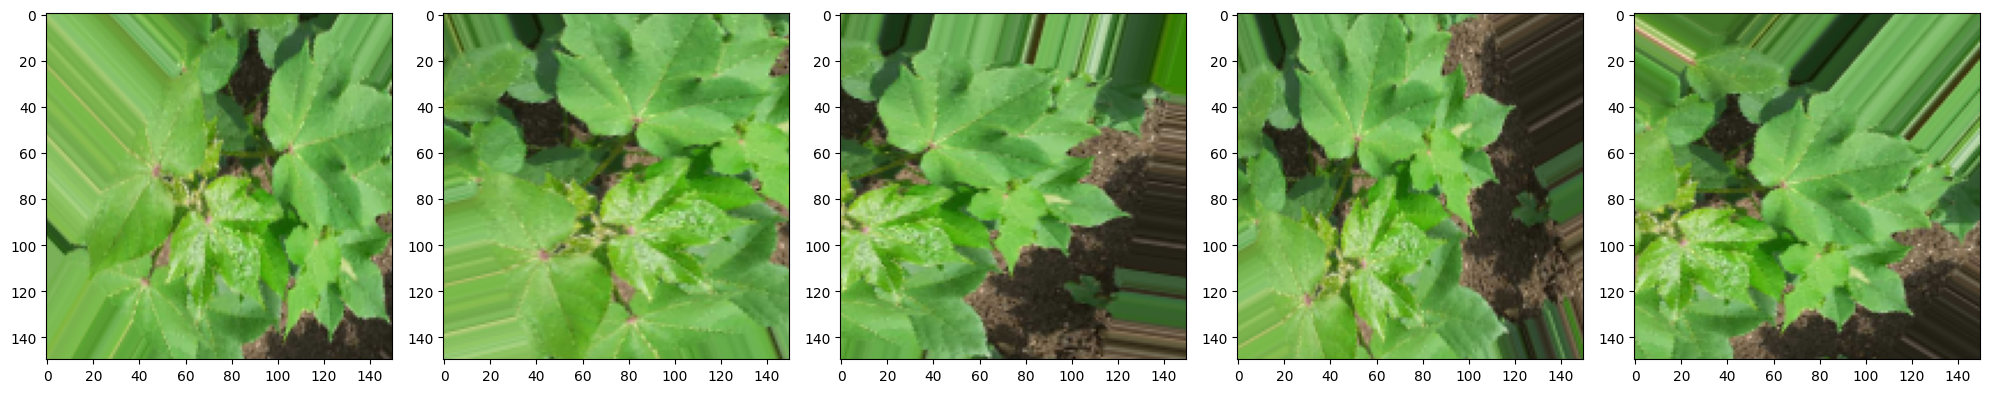

In [23]:
# showing images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [24]:
model_path = '/content/Cotton Disease'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [25]:
#Building cnn model

cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),  
                                                                       
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),  
                                                                                                           
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                     
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'), 
                                                                        
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [27]:
# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 

In [28]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [29]:
# train cnn model

history = cnn_model.fit(training_data, 
                          epochs=20, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 

Epoch 1/20
61/61 [==============================] - ETA: 0s - loss: 1.2502 - accuracy: 0.4352
Epoch 1: val_accuracy improved from -inf to 0.54941, saving model to /content/Cotton Disease


61/61 [==============================] - 36s 446ms/step - loss: 1.2502 - accuracy: 0.4352 - val_loss: 1.0600 - val_accuracy: 0.5494
Epoch 2/20
61/61 [==============================] - ETA: 0s - loss: 1.0681 - accuracy: 0.5500
Epoch 2: val_accuracy improved from 0.54941 to 0.59684, saving model to /content/Cotton Disease


61/61 [==============================] - 31s 505ms/step - loss: 1.0681 - accuracy: 0.5500 - val_loss: 0.9171 - val_accuracy: 0.5968
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 0.9570 - accuracy: 0.6207
Epoch 3: val_accuracy improved from 0.59684 to 0.71542, saving model to /content/Cotton Disease


61/61 [==============================] - 29s 483ms/step - loss: 0.9570 - accuracy: 0.6207 - val_loss: 0.7532 - val_accuracy: 0.7154
Epoch 4/20
61/61 [==============================] - ETA: 0s - loss: 0.8712 - accuracy: 0.6453
Epoch 4: val_accuracy did not improve from 0.71542
61/61 [==============================] - 28s 453ms/step - loss: 0.8712 - accuracy: 0.6453 - val_loss: 0.9295 - val_accuracy: 0.6008
Epoch 5/20
61/61 [==============================] - ETA: 0s - loss: 0.8453 - accuracy: 0.6591
Epoch 5: val_accuracy did not improve from 0.71542
61/61 [==============================] - 25s 409ms/step - loss: 0.8453 - accuracy: 0.6591 - val_loss: 0.7487 - val_accuracy: 0.6957
Epoch 6/20
61/61 [==============================] - ETA: 0s - loss: 0.8235 - accuracy: 0.6658
Epoch 6: val_accuracy did not improve from 0.71542
61/61 [==============================] - 25s 399ms/step - loss: 0.8235 - accuracy: 0.6658 - val_loss: 0.7139 - val_accuracy: 0.7075
Epoch 7/20
61/61 [===================

61/61 [==============================] - 28s 457ms/step - loss: 0.7577 - accuracy: 0.6981 - val_loss: 0.6268 - val_accuracy: 0.7549
Epoch 9/20
61/61 [==============================] - ETA: 0s - loss: 0.7916 - accuracy: 0.6894
Epoch 9: val_accuracy did not improve from 0.75494
61/61 [==============================] - 25s 405ms/step - loss: 0.7916 - accuracy: 0.6894 - val_loss: 0.7896 - val_accuracy: 0.6561
Epoch 10/20
61/61 [==============================] - ETA: 0s - loss: 0.7303 - accuracy: 0.7140
Epoch 10: val_accuracy improved from 0.75494 to 0.77470, saving model to /content/Cotton Disease


61/61 [==============================] - 27s 437ms/step - loss: 0.7303 - accuracy: 0.7140 - val_loss: 0.5636 - val_accuracy: 0.7747
Epoch 11/20
61/61 [==============================] - ETA: 0s - loss: 0.7037 - accuracy: 0.7253
Epoch 11: val_accuracy did not improve from 0.77470
61/61 [==============================] - 25s 407ms/step - loss: 0.7037 - accuracy: 0.7253 - val_loss: 0.5817 - val_accuracy: 0.7549
Epoch 12/20
61/61 [==============================] - ETA: 0s - loss: 0.6538 - accuracy: 0.7442
Epoch 12: val_accuracy did not improve from 0.77470
61/61 [==============================] - 25s 410ms/step - loss: 0.6538 - accuracy: 0.7442 - val_loss: 1.0879 - val_accuracy: 0.5692
Epoch 13/20
61/61 [==============================] - ETA: 0s - loss: 0.6737 - accuracy: 0.7391
Epoch 13: val_accuracy did not improve from 0.77470
61/61 [==============================] - 25s 405ms/step - loss: 0.6737 - accuracy: 0.7391 - val_loss: 0.6100 - val_accuracy: 0.7628
Epoch 14/20
61/61 [============

61/61 [==============================] - 26s 434ms/step - loss: 0.5683 - accuracy: 0.7899 - val_loss: 0.4972 - val_accuracy: 0.7826
Epoch 16/20
61/61 [==============================] - ETA: 0s - loss: 0.5330 - accuracy: 0.7868
Epoch 16: val_accuracy did not improve from 0.78261
61/61 [==============================] - 24s 399ms/step - loss: 0.5330 - accuracy: 0.7868 - val_loss: 0.7025 - val_accuracy: 0.7273
Epoch 17/20
61/61 [==============================] - ETA: 0s - loss: 0.5315 - accuracy: 0.7945
Epoch 17: val_accuracy did not improve from 0.78261
61/61 [==============================] - 24s 386ms/step - loss: 0.5315 - accuracy: 0.7945 - val_loss: 0.5116 - val_accuracy: 0.7668
Epoch 18/20
61/61 [==============================] - ETA: 0s - loss: 0.5243 - accuracy: 0.8011
Epoch 18: val_accuracy improved from 0.78261 to 0.84585, saving model to /content/Cotton Disease


61/61 [==============================] - 26s 430ms/step - loss: 0.5243 - accuracy: 0.8011 - val_loss: 0.3491 - val_accuracy: 0.8458
Epoch 19/20
61/61 [==============================] - ETA: 0s - loss: 0.5278 - accuracy: 0.7945
Epoch 19: val_accuracy did not improve from 0.84585
61/61 [==============================] - 25s 406ms/step - loss: 0.5278 - accuracy: 0.7945 - val_loss: 0.6248 - val_accuracy: 0.7352
Epoch 20/20
61/61 [==============================] - ETA: 0s - loss: 0.4610 - accuracy: 0.8165
Epoch 20: val_accuracy did not improve from 0.84585
61/61 [==============================] - 25s 405ms/step - loss: 0.4610 - accuracy: 0.8165 - val_loss: 0.6343 - val_accuracy: 0.7431


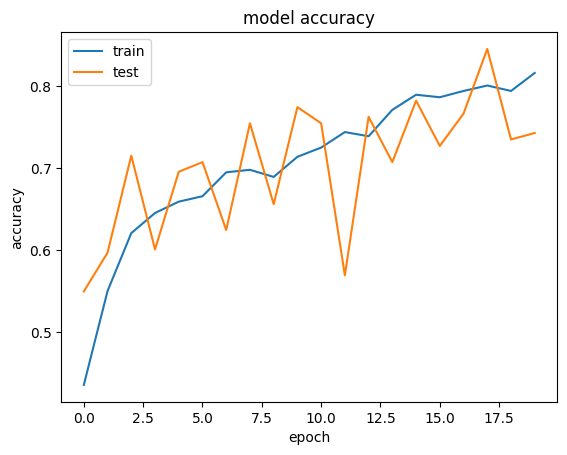

In [30]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

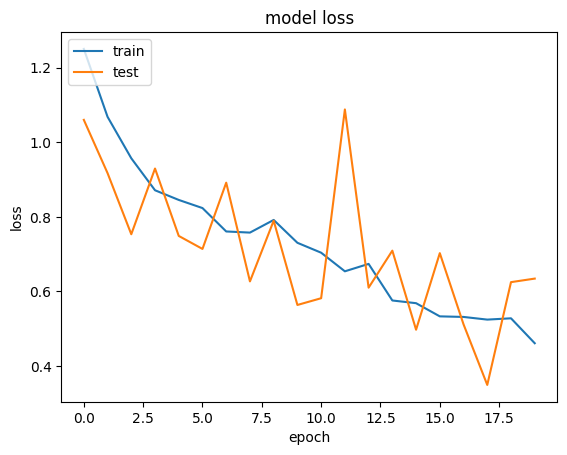

{'loss': [1.2502416372299194,
  1.0681285858154297,
  0.9569500088691711,
  0.8711681962013245,
  0.8452509045600891,
  0.8234522938728333,
  0.7606892585754395,
  0.7576550841331482,
  0.7915831208229065,
  0.7303061485290527,
  0.7037283778190613,
  0.6538276672363281,
  0.673704206943512,
  0.5756028294563293,
  0.5683326125144958,
  0.5330106019973755,
  0.5314644575119019,
  0.5243172645568848,
  0.5277985334396362,
  0.4609585106372833],
 'accuracy': [0.43516144156455994,
  0.5499743819236755,
  0.6207073330879211,
  0.64531010389328,
  0.659149169921875,
  0.6658124327659607,
  0.6950281858444214,
  0.6981035470962524,
  0.6893900632858276,
  0.7139928340911865,
  0.725269079208374,
  0.7442337274551392,
  0.739108145236969,
  0.7713992595672607,
  0.7898513674736023,
  0.7867760062217712,
  0.7944643497467041,
  0.8011276125907898,
  0.7944643497467041,
  0.8165043592453003],
 'val_loss': [1.059977412223816,
  0.9171459674835205,
  0.7532183527946472,
  0.9294502139091492,
  0.

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history